# Movie Data Analysis: What are the most important variables that correlate to high profit in the movie industry
### Jarred Petersen

This project uses python to perform analysis on a data set regarding important movie features such as budget, genre, actor etc in order to determine what are the most important variables that correlate top a high profit.

*Link to data* 
https://www.kaggle.com/datasets/danielgrijalvas/movies/code

### Part 1 - Import packages & read in data

In [44]:
# Part 1 - Import packages and read in data

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in the data

df = pd.read_csv(r'C:\Users\jarre\Downloads\movies.csv')

### Part 2 - Exploring the data 

Now that we have imported the python packages we will be using and have read in the data, it is important to explore the data so that we know what the data is trying to tell us, what the format of the data is, and what cleaning needs to be done before we begin analyzing.

In [3]:
# Exploring the data

# Glimpse of data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Above we see a little glimpse of the data.

In [4]:
# View dimensions of data

df.shape

(7668, 15)

Viewing the dimensions of the data, we see that we have 7668 observations and 15 columns 

In [5]:
# View data variables

df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

Above we have the names of the columns. From this we can see that the data set contains information on movies such as the name, the rating, the movie genre, the year it was released, the score it recieved, the number of votes it recieved, the director, the movie star, the country it was made, its budget, how much the movie grossed, the company of the movie, and the runtime.

### Part 3 - Cleaning the data

Now that we have a better understanding of what we are working with, we now have to clean the data.

Firstly, I will check for any missing values in the data set.

In [6]:
# View missing values in each column in descending order

df.isnull().sum().sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

Above we see that we have a lot of missing values. Most of these missing values are in the 'budget' column. We also have a significant amount of NA values in the gross 'column'. Therefore, I will create a boxplot of both 'budget' and 'gross' to see if there are any outliers in the data.

<Axes: >

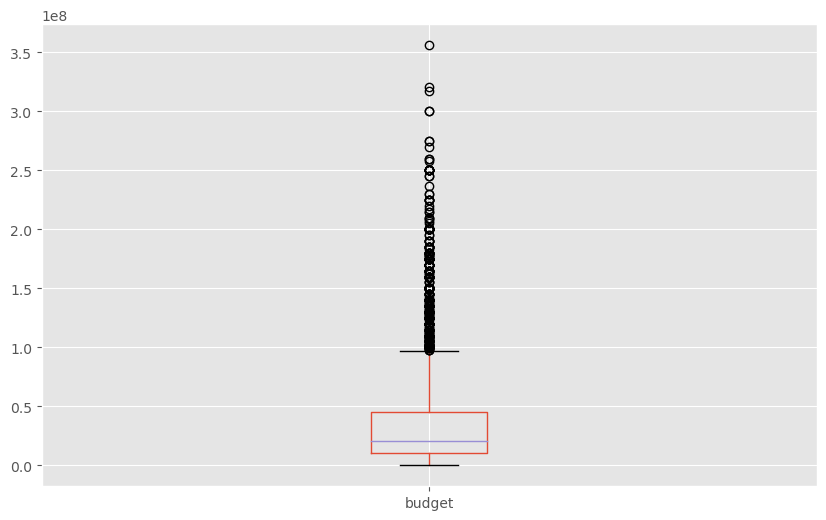

In [46]:
# Create box plot of 'budget' column to check for outliers

df.boxplot(column=['budget'])

The boxplot shows us that there are many extreme outliers in the 'budget' column. Therefore, I will use the median value of 'budget' to fill in these NAs.

In [13]:
# Lots of extreme outliers in 'budget' column.
# Will use median budget value to fill NA values

df['budget'].fillna(df['budget'].median(), inplace=True)

<Axes: >

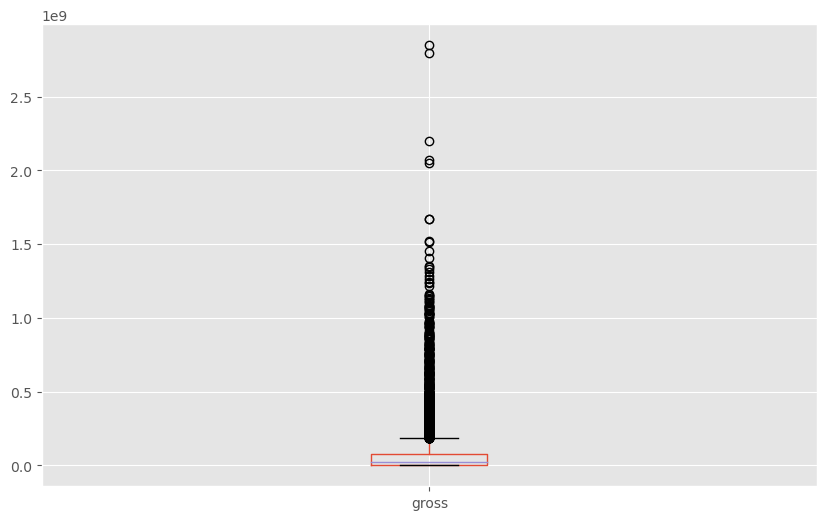

In [47]:
# View box plot of 'gross' to check for outliers

df.boxplot(column=['gross'])

We have the same issue with the 'gross' column, therefore I will also use the median of this column to fill NA values.

In [9]:
# Similar to 'budget' with lots of extreme outliers
# Will fill NAs with median of 'gross'

df['gross'].fillna(df['gross'].median(), inplace=True)

I will then simply drop all remaining NA values from the data.

In [10]:
# Now budget and median NAs have been filled with median of those columns
# drop other NA values from the data as this should not effect analysis

movie = df.dropna()

In [11]:
# Check if removing NA values has been successful

movie.isnull().sum().sort_values(ascending=False)

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

Above we see that we have been successful at removing all NA values. Next, I will remove any duplicate values from the data.

In [12]:
# drop any duplicates in data

movie.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0


When I look at the data, I see that the year value in 'released' and the year value in 'year' do not match in all the observations. Therefore, I will extract the year value in 'released' and use it in a new column called 'yearcorrect'.

In [13]:
# 'year' column and 'released' year value don't match all observations
# create new column for correct year taken from 'released' column.

movie['yearcorrect'] = movie['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [14]:
print(movie.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object


The final bit of cleaning I want to do is add a 'profit' column by using 'gross' - 'budget'. I will then sort the data by 'profit' in descending order.

In [15]:
# Add 'profit' column using 'gross' - ' budget'

movie['profit'] = movie['gross'] - movie['budget']

movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,33846344.0


In [16]:
# order data by profit 

movie.sort_values(by = ['profit'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009,2.610246e+09
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,2.441501e+09
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997,2.001647e+09
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015,1.824522e+09
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,1.727360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,Cutthroat Island,PG-13,Action,1995,"December 22, 1995 (United States)",5.7,27000.0,Renny Harlin,Michael Frost Beckner,Geena Davis,France,98000000.0,1.001732e+07,Beckner/Gorman Productions,124.0,1995,-8.798268e+07
6023,Jin ling shi san chai,R,Drama,2011,"December 16, 2011 (China)",7.6,51000.0,Yimou Zhang,Heng Liu,Christian Bale,China,94000000.0,2.855644e+06,Beijing New Picture Film,146.0,2011,-9.114436e+07
4218,The Adventures of Pluto Nash,PG-13,Action,2002,"August 16, 2002 (United States)",3.8,25000.0,Ron Underwood,Neil Cuthbert,Eddie Murphy,United States,100000000.0,7.103973e+06,Castle Rock Entertainment,95.0,2002,-9.289603e+07
3485,The 13th Warrior,R,Action,1999,"August 27, 1999 (United States)",6.6,119000.0,John McTiernan,Michael Crichton,Antonio Banderas,United States,160000000.0,6.169890e+07,Touchstone Pictures,102.0,1999,-9.830110e+07


### Part 4 - What are the most important variables that correlate to a high profit?

**Budget vs Profit**

Firstly, I will look into the impact budget has on profit by creating a scatter plot with 'budget' on the x axis, and 'profits' on the y axis.

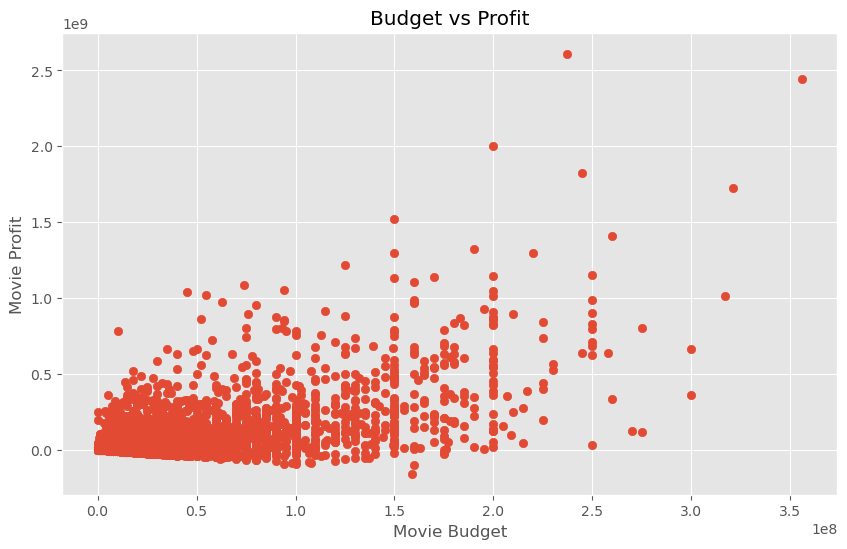

In [48]:
# Scatter plot

plt.scatter(x = movie['budget'], y = movie['profit']) 

# Add title and lables to graph 

plt.title('Budget vs Profit')
plt.xlabel('Movie Budget')
plt.ylabel('Movie Profit')

# Show plot 

plt.show()

From this scatter plot, it is hard to tell if these two variables are correlated. To help with the interpretation of this graph, we can use the seaborn library to add a regression line.

Text(0, 0.5, 'Movie Profit')

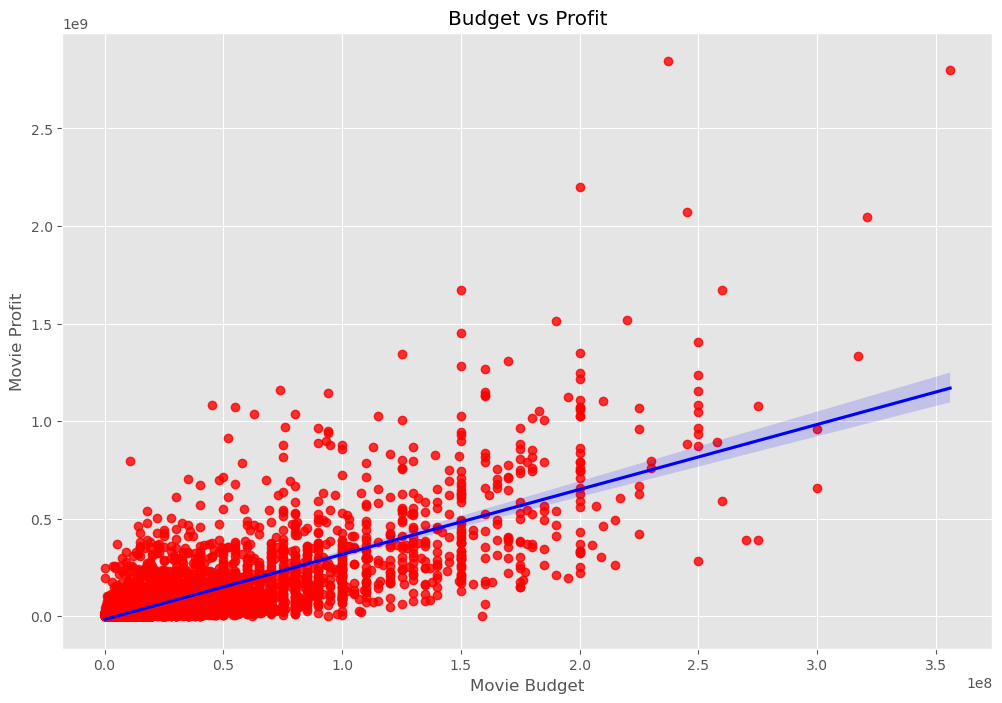

In [19]:
# Plotting regression plot for Budget vs Gross

sns.regplot(x = 'budget', y = 'gross', data = movie, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

# Add title and axis labels

plt.title("Budget vs Profit")
plt.xlabel("Movie Budget")
plt.ylabel("Movie Profit")

By adding this regression line, we can see that the budget of the movie and the profit are positively correlated. As budget increases, profit increases. We can look deeper into the correlation between these two variables.

In [20]:
# View correlation value of budget and profit

correlation = movie['budget'].corr(movie['profit'])

print(correlation)

0.6106686122086679


Above we see that the correlation value between budget and profit is
0.61
Therefore, we can conclude that these two variables are pretty strongly correlated. Therefore, we can conclude that larger movie budgets tend to bring in higher profits. 

However, we want to compare the correlations of all the variables with profit in order to determine which variables are the most important in determining a higher profit. To do this we can create confusion matrices and heatmaps with all the variables. To do this, we firstly need to factorize all the non-numeric data types using cat codes.

In [28]:
# Cat code columns with data type = 'object'

df_cat = movie

for col_name in df_cat.columns:
    if(df_cat[col_name].dtype == 'object'):
        df_cat[col_name] = df_cat[col_name].astype('category')
        df_cat[col_name] = df_cat[col_name].cat.codes

df_cat.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit
0,4738,6,6,1980,1312,8.4,927000.0,1823,2868,715,48,19000000.0,46998772.0,1463,146.0,1980,27998772.0
1,3971,6,1,1980,1135,5.8,65000.0,1605,1173,220,49,4500000.0,58853106.0,464,104.0,1980,54353106.0
2,3680,4,0,1980,1367,8.7,1200000.0,765,1842,1177,49,18000000.0,538375067.0,966,124.0,1980,520375067.0
3,205,4,4,1980,1135,7.7,221000.0,898,1432,1501,49,3500000.0,83453539.0,1134,88.0,1980,79953539.0
4,739,6,4,1980,1178,7.3,108000.0,725,355,278,49,6000000.0,39846344.0,1108,98.0,1980,33846344.0


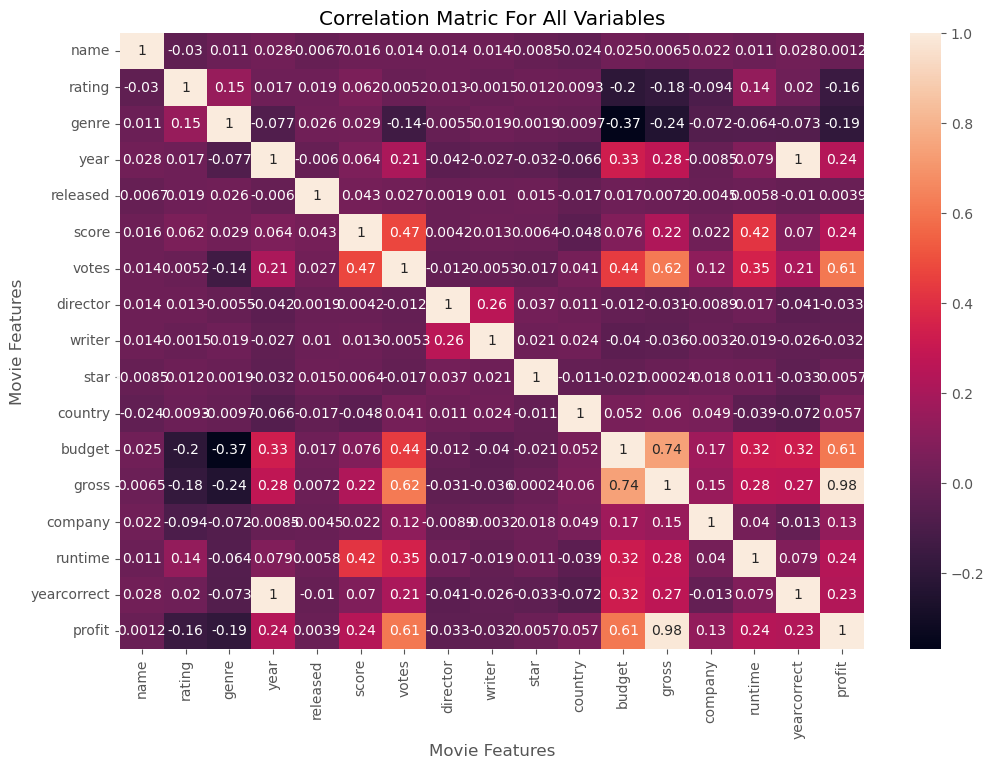

In [26]:
# Plot heatmap of correlations

correlation_matrix = df_cat.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric For All Variables')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

Above, we have the correlation values for every variable in the data set.
Focusing on profit, we can take away a couple things.
Firstly, its important to note that of course gross has the highest correlation with profit. The bigger the total gross of the movie, the bigger the profit.
What is interesting is that 'votes' has the next highest correlation value at 0.63. In 3rd we have budget with a correlation value of 0.62.
Surprisingly, genre had the lowest correlation value with profit. 

The above heatmap contains a lot of information. If we were looking at the correlations for multiple different variables, this may be useful. However, for the purpose of this project we are looking specifically at the correlation of variables that lead to higher profit. Therefore, we can look specifically at the correlation values between profit and the other variables, as shown below:

In [43]:
# View correlation values for 'profit'

print(df_cat.corr()['profit'])

name           0.001187
rating        -0.160166
genre         -0.190772
year           0.238380
released       0.003917
score          0.242886
votes          0.609694
director      -0.032978
writer        -0.031645
star           0.005744
country        0.056874
budget         0.610669
gross          0.984372
company        0.132219
runtime        0.241016
yearcorrect    0.233779
profit         1.000000
Name: profit, dtype: float64


Above we have the correlation values between profit and all the variables in the data set. This is much easier to interpret.
From this, we can conclude that the most important variables that correlate to high profits in the movie industry are the movie budget, and the movie votes.

This concludes my project, thank you. 